<a href="https://colab.research.google.com/github/ale-chen/ML-Projects/blob/main/NNStructure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%pip install sklearn
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import seaborn as sns

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


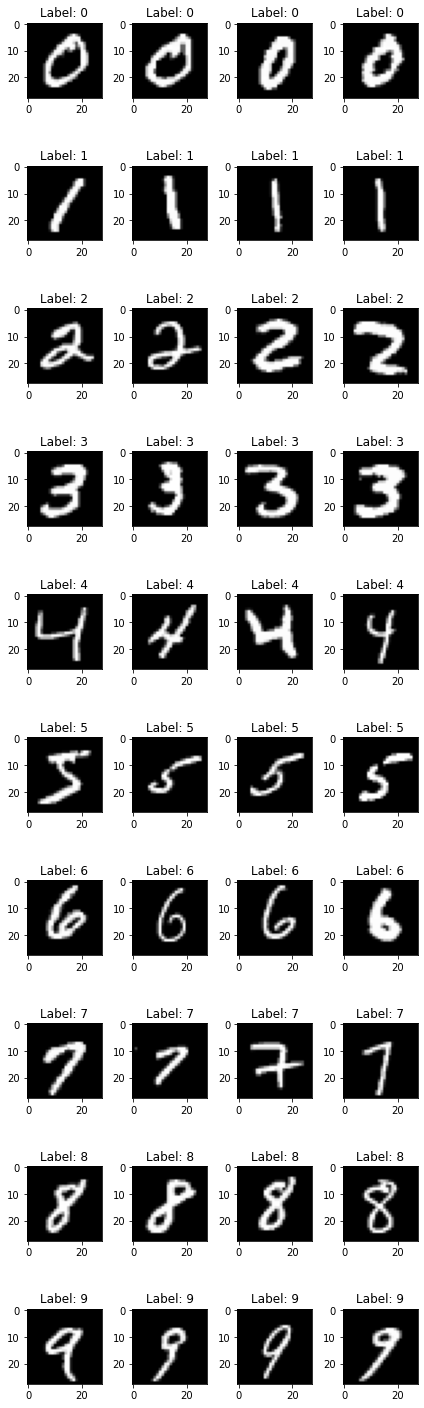

In [ ]:
n = 40

n_rows = 10
n_cols = 4# plot images
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.5*n_cols,2*n_rows))

images = []
labels = []

count = 0

for i in range(10):
  for j in range(len(X_train)):
    if(y_train[j] == i and count < 4):
      images.append(X_train[j])
      labels.append(y_train[j])
      count+=1
    elif(count == 4):
      count = 0
      break

for i in range(n):
    ax = axes[i//n_cols, i%n_cols]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from itertools import chain

In [ ]:
def toDf(X, length):
  result = []
  for i in X:
    result.append(list(chain.from_iterable(i)))
  return pd.DataFrame(result)
X_tr = toDf(X_train, 60000)
X_te = toDf(X_test, 60000)

y_tr = pd.get_dummies(y_train)
y_te = pd.get_dummies(y_test)

In [ ]:
def unencode(y):
  y_result = []
  for pred in y:
    category = np.argmax(pred)
    y_result.append(category)
  return y_result

clf = MLPClassifier(solver = "adam", max_iter = 50,
                    activation = "relu",
                    random_state = 5)
clf.fit(X_tr, y_tr)
result1 = clf.predict(X_te)

y_pred1 = unencode(result1)
y_ans = unencode(y_te.values)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


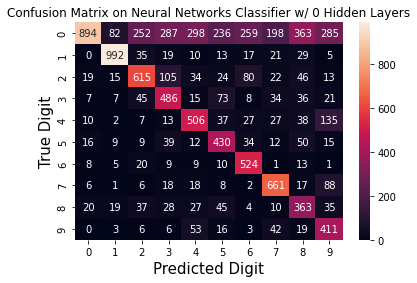

In [ ]:
confusion1 = confusion_matrix(y_pred1, y_ans)
sns.heatmap(confusion1, annot=True, fmt="g")
plt.title("Confusion Matrix on Neural Networks Classifier w/ 0 Hidden Layers")
plt.xlabel("Predicted Digit", fontsize=15)
plt.ylabel("True Digit", fontsize=15)
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(y_ans, y_pred1))

Accuracy:  0.5882


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


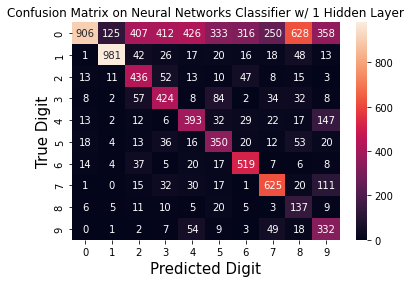

In [ ]:
clf2 = MLPClassifier(solver = "adam", max_iter = 10, hidden_layer_sizes = (100), activation = "relu", random_state = 33)
clf2.fit(X_tr, y_tr)
result2 = clf2.predict(X_te)

y_pred2 = unencode(result2)

plt.clf()

confusion2 = confusion_matrix(y_pred2, y_ans)
sns.heatmap(confusion2, annot=True, fmt="g")

plt.title("Confusion Matrix on Neural Networks Classifier w/ 1 Hidden Layer")
plt.xlabel("Predicted Digit", fontsize=15)
plt.ylabel("True Digit", fontsize=15)
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(y_ans, y_pred2))

Accuracy:  0.5103


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


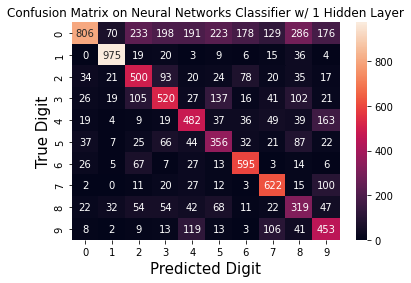

In [ ]:
clf3 = MLPClassifier(solver = "adam", max_iter = 50, hidden_layer_sizes = (100, 100), activation = "relu", random_state = 56)
clf3.fit(X_tr, y_tr)
result3 = clf3.predict(X_te)

y_pred3 = unencode(result3)

confusion3 = confusion_matrix(y_pred3, y_ans)
sns.heatmap(confusion3, annot=True, fmt="g")
plt.title("Confusion Matrix on Neural Networks Classifier w/ 1 Hidden Layer")
plt.xlabel("Predicted Digit", fontsize=15)
plt.ylabel("True Digit", fontsize=15)
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(y_ans, y_pred3))

Accuracy:  0.5628


In [ ]:
total = np.array(confusion1) + np.array(confusion2) + np.array(confusion3)

summary = pd.DataFrame()
summary["Network"],summary["Accuracy"] = ["0 Layer", "1 Layer", "2 Layer"], [accuracy_score(y_ans, y_pred1),accuracy_score(y_ans, y_pred2), accuracy_score(y_ans, y_pred3)]
summary

,Network,Accuracy
0,0 Layer,0.5882
1,1 Layer,0.5103
2,2 Layer,0.5628


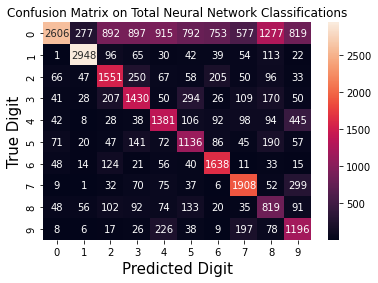

In [ ]:
sns.heatmap(total, annot=True, fmt="g")
plt.title("Confusion Matrix on Total Neural Network Classifications")
plt.xlabel("Predicted Digit", fontsize=15)
plt.ylabel("True Digit", fontsize=15)
plt.show()

In [ ]:
from tables import indexes
from matplotlib.transforms import count_bboxes_overlapping_bbox
"""THE MOST INACCURATE PAIR WAS CLASSIFYING 0 AS AN 8"""
count = {
    8: 0,
    4: 0,
    2: 0
}
index = {
    8: 0,
    4: 1,
    2: 2
}
#0 as 8, 0 as 4, 0 as 2
wrong_images = [[],[],[]]
wrong_labels = [8,8,8,4,4,4,2,2,2]
for idx in range(len(y_ans)):
  if(y_train[idx] == 0 and 
    (y_pred3[idx] == 8 or y_pred3[idx] == 4 or y_pred3[idx] == 2)
    ):
    wrong_images[index[y_pred3[idx]]].append(X_train[idx])
    
    count[y_pred3[idx]] += 1
  if(all([c == 3 for c in count.values()])):
    break

print(count)
print(wrong_labels)

wrong_images = np.array([wrong_images[0][0:3],wrong_images[1][0:3],wrong_images[2][0:3]])
flattened = []
flattened.extend(wrong_images[0])
flattened.extend(wrong_images[1])
flattened.extend(wrong_images[2])

{8: 68, 4: 77, 2: 98}
[8, 8, 8, 4, 4, 4, 2, 2, 2]


3


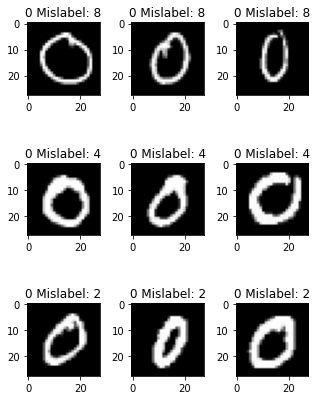

In [ ]:
print(len(wrong_images))

n = 9

n_rows = 3
n_cols = 3

# plot images
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.5*n_cols,2*n_rows))
for i in range(n):
    ax = axes[i//n_cols, i%n_cols]
    ax.imshow(flattened[i], cmap='gray')
    ax.set_title('0 Mislabel: {}'.format(wrong_labels[i]))
plt.tight_layout()
plt.show()

Weight Matrix Visualization for Single Layer Model:


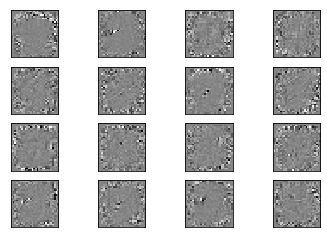

Weight Matrix Visualization for Quadruple Layer Model


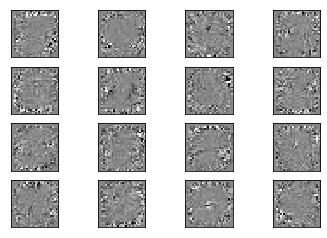

In [ ]:
def visual(c):
  fig, axes=plt.subplots(4,4)
  vmin, vmax=c.coefs_[0].min(), c.coefs_[0].max()
  for coef, ax in zip(c.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28,28), cmap=plt.cm.gray, vmin=0.5*vmin, vmax=0.5*vmax)
    ax.set_xticks(())
    ax.set_yticks(())
  plt.show()
print("Weight Matrix Visualization for Single Layer Model:")
visual(clf)
print("Weight Matrix Visualization for Quadruple Layer Model")
visual(clf3)

In [ ]:
"""
Input weight visualizations are not very qualitatively different.

However, I didn't set it to iterate enough times for the results to be
wildly different, so perhaps had I done so there would be qualitative
differences.
"""